In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline                                   
matplotlib.rcParams['figure.figsize'] = (12,8)        # Adjusts the configurations of the plots we will create

# Read in the data

df = pd.read_csv("C:\code\Pandas_Kaggle\movies1.csv")
# df.head()

In [4]:
# Let's see whether there is a missing value interms of percentage
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# Let's see the datatypes of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Fillna is used to fill NAN values throught the table
df= df.fillna('0')

# The below code will change the data type to int64 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [8]:
# Sorting according to gross
df.sort_values(by=['gross'], inplace = False,  ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


In [10]:
# To find duplicate values
# The below code will only prine unique values

df['company'].drop_duplicates().sort_values(ascending = False)

# If you dont sepcify drop_duplicates() all the company values will be printed

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
408                                       0
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

In [11]:
# lETS CHECK THE RELATION OF GROSS WITH BUDGET USING SCATTER PLOT

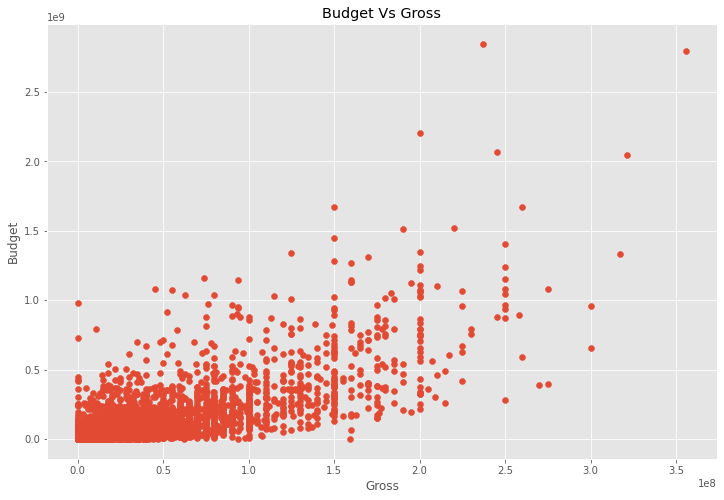

In [12]:
plt.scatter(x=df['budget'], y= df['gross'])
plt.title('Budget Vs Gross')
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

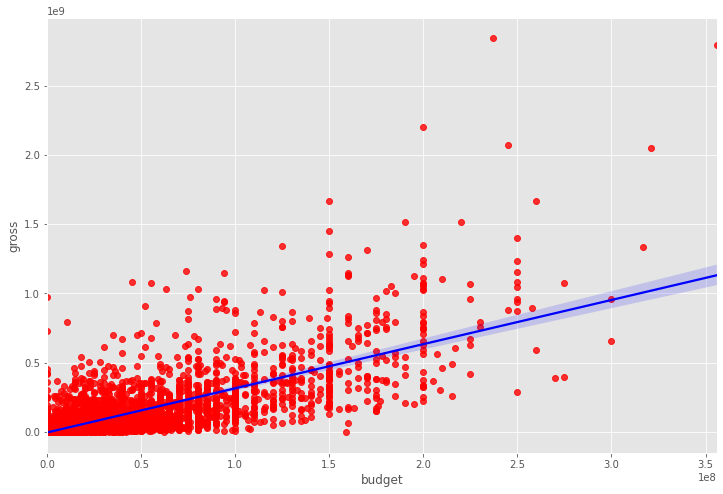

In [13]:
# Its hard to correlate in the above graph
# Now we are going to use seaborn and regression plot

sns.regplot(x='budget', y= 'gross', data = df, scatter_kws={"color": "red"}, line_kws= {"color": "blue"})


In [14]:
#Let's start to correlate
df.corr()         

# High correlation exist between budget and gross = 0.75

,year,budget,gross
year,1.000000,0.309212,0.261900
budget,0.309212,1.000000,0.750157
gross,0.261900,0.750157,1.000000


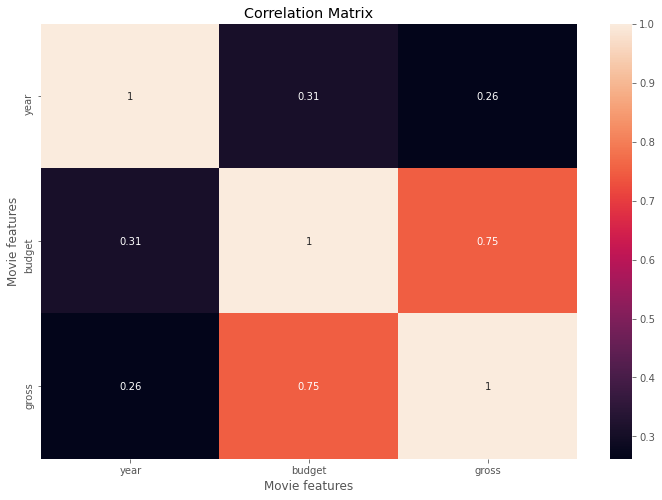

In [16]:
# Here I have visualized the correlation using heatmap
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix')
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()